In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Dataset 1

Initializing datasets filepaths

In [25]:
file_paths = {
    '1_ef_b': 'drive/My Drive/Datasets/1_ef_b.csv',
    '1_nrml_b': 'drive/My Drive/Datasets/1_nrml_b.csv',
    '1_ef_ub': 'drive/My Drive/Datasets/1_ef_ub.csv',
    '1_nrml_ub': 'drive/My Drive/Datasets/1_nrml_ub.csv'
}

Loading the dataset into pandas dataframe,

Dropping the results column (whether the patient has lung cancer or not)

Feature scaling the data frame

In [29]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_paths['1_ef_b'])

true_labels = df['LUNG_CANCER'] #target coloumn
df_numerical = df.drop(['LUNG_CANCER'], axis=1, errors='ignore')

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

K-Means Clustering

In [61]:
# Elbow Method to find optimal K
inertia_values = []
sil_scores = []
K_range = range(2, 10)  # Test K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    # Get the cluster labels (the assigned cluster for each data point)
    labels = kmeans.labels_

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the inertia (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)

    # Calculate the silhouette score
    sil_score = silhouette_score(df_scaled,labels)

    sil_scores.append(sil_score)

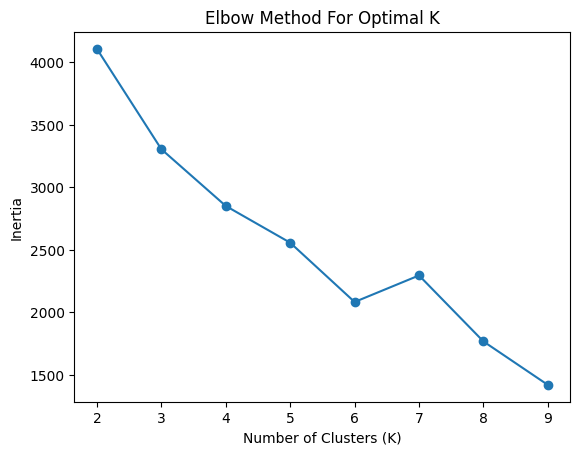

In [62]:
# Plot the inertia values to visualize the elbow
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()


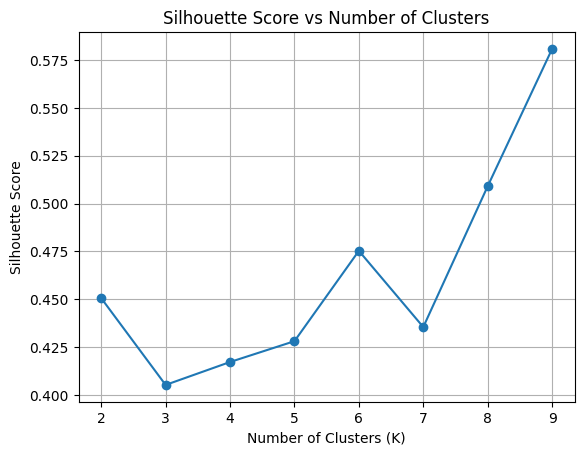

In [63]:
# Plotting the silhouette scores
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [64]:
# Determine optimal K according to inertia (Elbow Method)
inertia_diffs = np.diff(inertia_values)  # Calculate differences in inertia values
inertia_diff_ratios = inertia_diffs[1:] / inertia_diffs[:-1]  # Ratios of successive differences
optimal_K_inertia = K_range[np.argmin(inertia_diff_ratios) + 2]  # +2 to correct index to K value

# Determine optimal K according to silhouette score
optimal_K_silhouette = K_range[np.argmax(sil_scores)]

# Print the optimal K values
print("Optimal number of clusters according to the Elbow Method (Inertia):", optimal_K_inertia)
print("Optimal number of clusters according to the Silhouette Score:", optimal_K_silhouette)


Optimal number of clusters according to the Elbow Method (Inertia): 8
Optimal number of clusters according to the Silhouette Score: 9


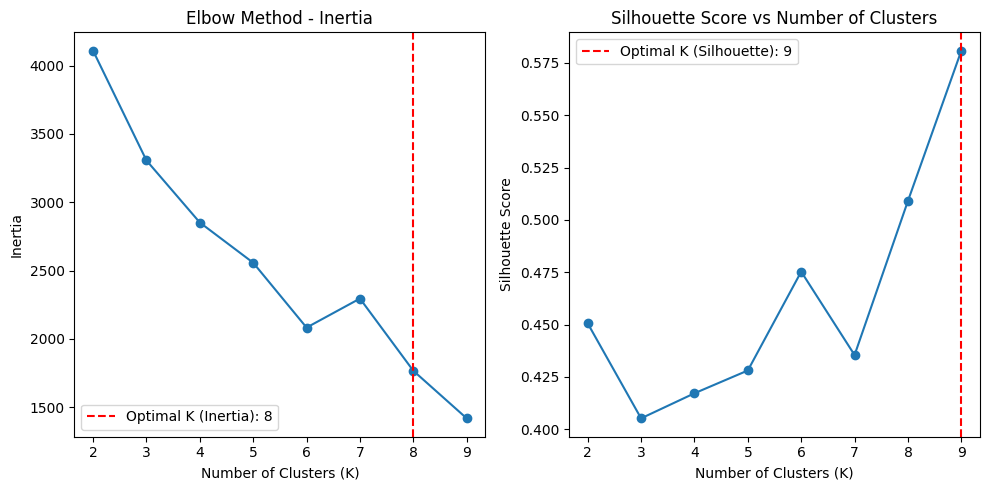

In [65]:
# Plotting the inertia values (Elbow method) and silhouette scores
plt.figure(figsize=(10, 5))

# Elbow Method Plot (Inertia)
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o')
plt.axvline(optimal_K_inertia, color='r', linestyle='--', label=f'Optimal K (Inertia): {optimal_K_inertia}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.legend()

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='o')
plt.axvline(optimal_K_silhouette, color='r', linestyle='--', label=f'Optimal K (Silhouette): {optimal_K_silhouette}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()